In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e7/sample_submission.csv
/kaggle/input/playground-series-s3e7/train.csv
/kaggle/input/playground-series-s3e7/test.csv
/kaggle/input/reservation-cancellation-prediction/train__dataset.csv
/kaggle/input/reservation-cancellation-prediction/test___dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
import missingno as mso

In [3]:
original_df = pd.read_csv("/kaggle/input/reservation-cancellation-prediction/train__dataset.csv")

In [4]:
train_1_df = pd.read_csv("/kaggle/input/playground-series-s3e7/train.csv", index_col = "id")

In [5]:
test_1_df = pd.read_csv("/kaggle/input/playground-series-s3e7/test.csv", index_col = "id")

In [6]:
submission_df = pd.read_csv("/kaggle/input/playground-series-s3e7/sample_submission.csv")

In [7]:
original_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [8]:
train_1_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [9]:
df = train_1_df.copy()

In [10]:
test_1_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
id,,,,,,,,,,,,,,,,,
42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [11]:
df_list = [df,test_1_df,original_df]
df_list_names = ["train_1","test_1","original"]
for i in range(0,len(df_list)):
    print(df_list_names[i],"-", df_list[i].shape)

train_1 - (42100, 18)
test_1 - (28068, 17)
original - (18137, 18)


In [12]:
for i in range(0,len(df_list)):
    print("\033[1m" + df_list_names[i]+ "\033[0m" ,"\n", df_list[i].isna().any().sum())

train_1 
 0
test_1 
 0
original 
 0


In [13]:
for i in range(0,len(df_list)):
    print("\033[1m" + df_list_names[i]+ "\033[0m" ,"\n", df_list[i].nunique())

train_1 
 no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                338
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations              10
no_of_previous_bookings_not_canceled      42
avg_price_per_room                      2286
no_of_special_requests                     6
booking_status                             2
dtype: int64
test_1 
 no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       7
no_of_week_nights      

In [14]:
Data_cat = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables in train_1 data \n'.format(len(Data_cat)))
print('Categorical Variables are :', Data_cat)

There are 0 categorical variables in train_1 data 

Categorical Variables are : []


In [15]:
Data_num = [num for num in df.columns if df[num].dtype != 'O']
print('There are {} numerical variable in train_1 data \n'.format(len(Data_num)))
print("Numerical Variables are", Data_num)

There are 18 numerical variable in train_1 data 

Numerical Variables are ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


Number of Unique Values in Booking Status : 2
Number of 1 and 0 in Booking Status are :
 0    25596
1    16504
Name: booking_status, dtype: int64


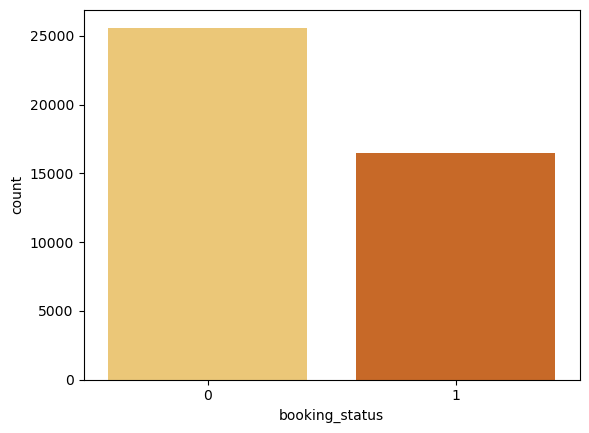

Percentage of 1: 39.20%
Percentage of 0: 60.80%
Missing values percentage: 0.00%


In [16]:
# Exploring the target Variable in train_1
print("Number of Unique Values in Booking Status :", df['booking_status'].nunique())
print("Number of 1 and 0 in Booking Status are :\n", df['booking_status'].value_counts())
sns.countplot(x="booking_status", data=df, palette="YlOrBr")
plt.show()
countY = len(df[df.booking_status == 1])
countN = len(df[df.booking_status == 0])
countNull = len(df[df.booking_status.isnull()])

print("Percentage of 1: {:.2f}%".format((countY / (len(df.booking_status))*100)))
print("Percentage of 0: {:.2f}%".format((countN / (len(df.booking_status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.booking_status))*100)))

Number of Unique Values in Booking Status : 2
Number of 1 and 0 in Booking Status are :
 0    12195
1     5942
Name: booking_status, dtype: int64


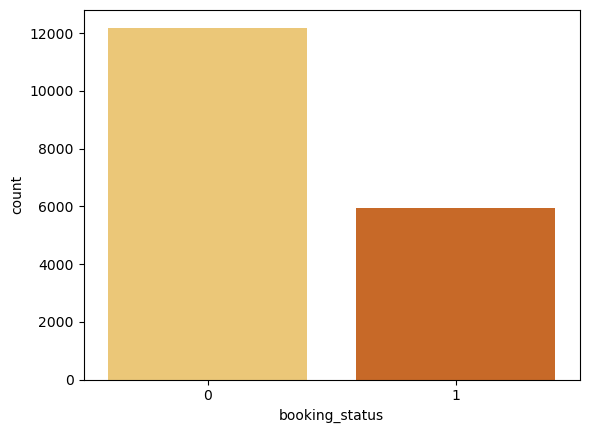

Percentage of 1: 32.76%
Percentage of 0: 67.24%
Missing values percentage: 0.00%


In [17]:
# Exploring the target Variable in original
print("Number of Unique Values in Booking Status :", original_df['booking_status'].nunique())
print("Number of 1 and 0 in Booking Status are :\n", original_df['booking_status'].value_counts())
sns.countplot(x="booking_status", data=original_df, palette="YlOrBr")
plt.show()
countY = len(original_df[original_df.booking_status == 1])
countN = len(original_df[original_df.booking_status == 0])
countNull = len(original_df[original_df.booking_status.isnull()])

print("Percentage of 1: {:.2f}%".format((countY / (len(original_df.booking_status))*100)))
print("Percentage of 0: {:.2f}%".format((countN / (len(original_df.booking_status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(original_df.booking_status))*100)))

In [18]:
df.describe(include="all")

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [19]:
categorical_feature = ['no_of_adults','no_of_children','no_of_weekend_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','arrival_year','arrival_month','market_segment_type','repeated_guest','no_of_special_requests']

continues_feature = ['avg_price_per_room']

other_feature = ['no_of_week_nights','lead_time','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled',]

In [20]:
df['generated'] = 1
test_1_df['generated'] = 1
original_df['generated'] = 0

In [21]:
train_1 = pd.concat([df, original_df], ignore_index=True, axis=0).reset_index(drop=True)

In [22]:
train_1.shape

(60237, 19)

In [23]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60237 entries, 0 to 60236
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          60237 non-null  int64  
 1   no_of_children                        60237 non-null  int64  
 2   no_of_weekend_nights                  60237 non-null  int64  
 3   no_of_week_nights                     60237 non-null  int64  
 4   type_of_meal_plan                     60237 non-null  int64  
 5   required_car_parking_space            60237 non-null  int64  
 6   room_type_reserved                    60237 non-null  int64  
 7   lead_time                             60237 non-null  int64  
 8   arrival_year                          60237 non-null  int64  
 9   arrival_month                         60237 non-null  int64  
 10  arrival_date                          60237 non-null  int64  
 11  market_segment_

In [24]:
target = 'booking_status'
features = test_1_df.columns.to_list()

In [25]:
from datetime import timedelta

for x in [train_1, df, original_df, test_1_df]:
    temp = x.copy()
    temp['arrival_year_month'] = pd.to_datetime(df['arrival_year'].astype(str) + df['arrival_month'].astype(str), format='%Y%m')

    temp.loc[temp.arrival_date > temp.arrival_year_month.dt.days_in_month, 'arrival_date'] = (temp.loc[temp.arrival_date > temp.arrival_year_month.dt.days_in_month, 'arrival_year_month'].dt.days_in_month)
    
    temp = temp.drop('arrival_year_month', axis=1)

    x['nights'] = x['no_of_weekend_nights'] + x['no_of_week_nights']
    x['lead_x_nights'] = x['lead_time'] * x['nights']
    
    x['arrival'] = pd.to_datetime(temp['arrival_year'].astype(str) + "/" + temp['arrival_month'].astype(str) + "/" + temp['arrival_date'].astype(str), errors='coerce')
    x['booking'] = x['arrival'] - pd.to_timedelta(x['lead_time'], unit='D')
    x['departure'] = x['arrival'] + pd.to_timedelta(x['nights'], unit='D')


In [26]:
train_1.isna().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
generated                                0
nights                                   0
lead_x_nights                            0
arrival                                 21
booking                                 21
departure  

In [27]:
test_1_df.isna().sum()

no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
generated                                0
nights                                   0
lead_x_nights                            0
arrival                                 40
booking                                 40
departure                               40
dtype: int6

In [28]:
df_list = [df,test_1_df,original_df,train_1]
df_list_names = ["train_1","test_1","original","train_1_df"]
for i in range(0,len(df_list)):
    print(df_list_names[i],"-", df_list[i].shape)

train_1 - (42100, 24)
test_1 - (28068, 23)
original - (18137, 24)
train_1_df - (60237, 24)


In [29]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
generated                               0
nights                                  0
lead_x_nights                           0
arrival                                 0
booking                                 0
departure                         

In [30]:
for y in [train_1, df, original_df, test_1_df]:
    y.drop(['booking', 'arrival', 'departure'], axis=1, inplace=True)
features = test_1_df.columns.to_list()

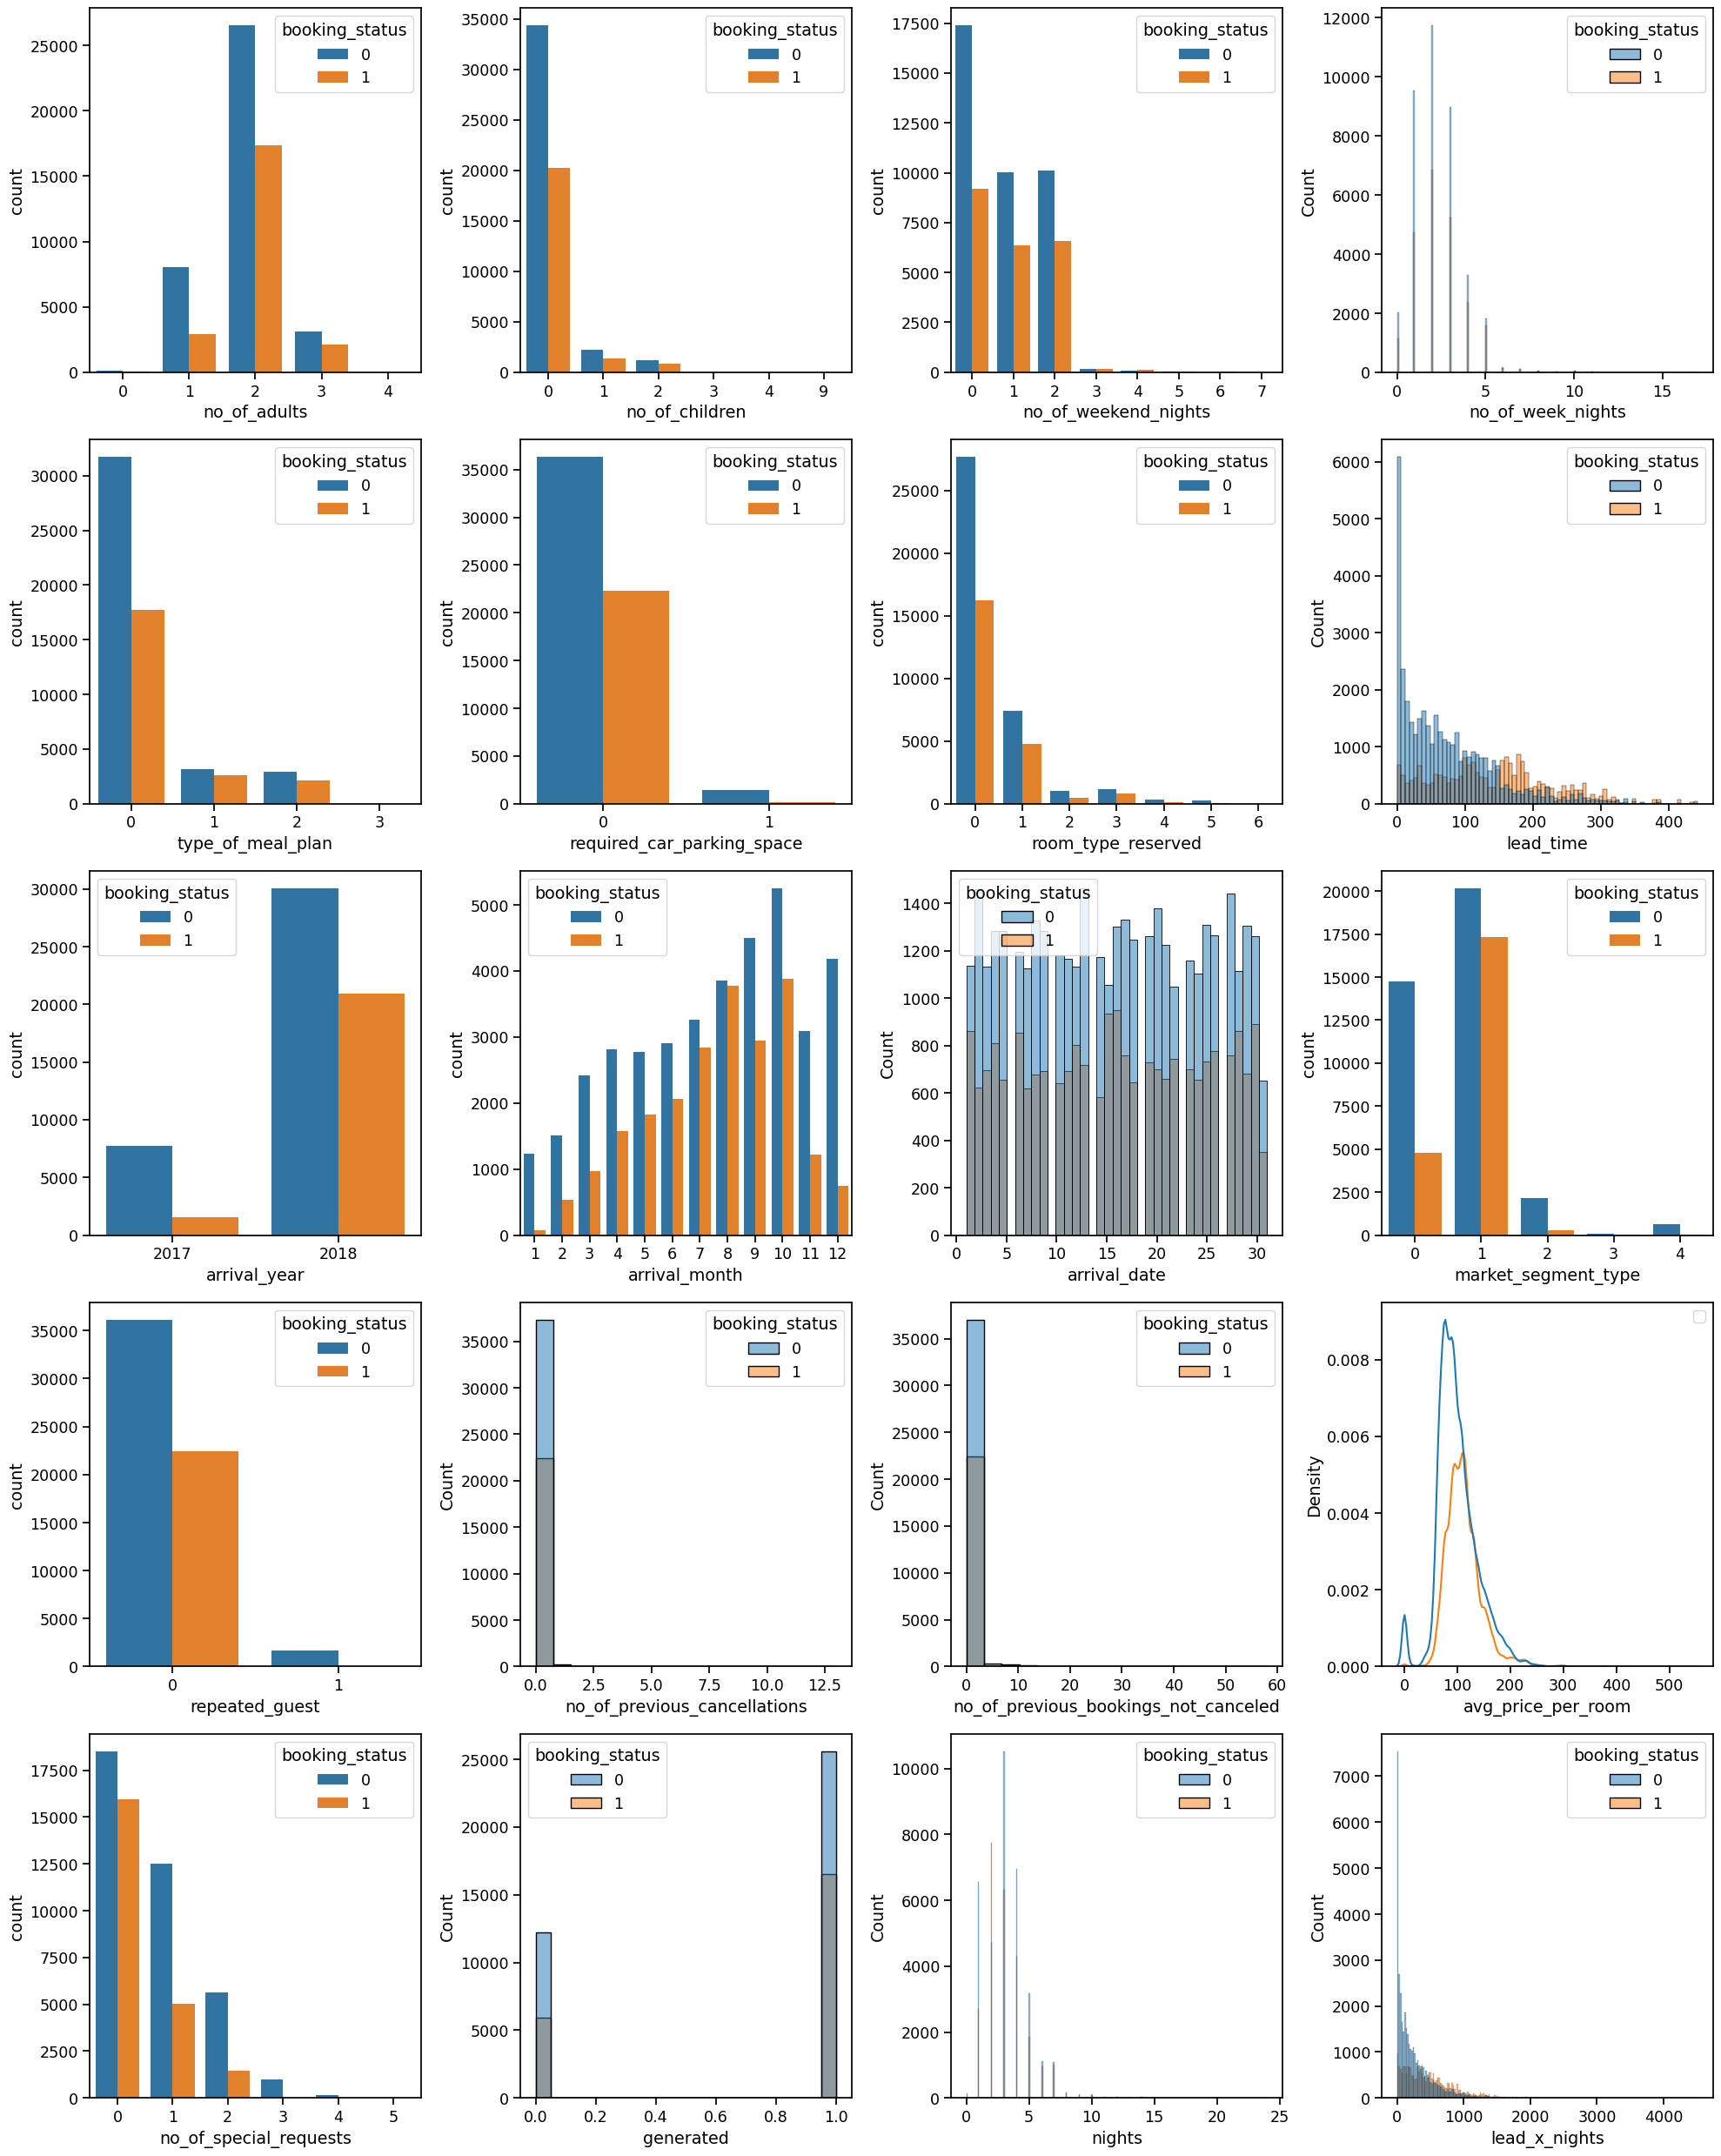

In [31]:
sns.set_context("notebook", font_scale=1.15) #, rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":20}) 
import math
qty = len(features)
ncols = 4
nrows = math.ceil(qty / ncols) 
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
r, c = 0, 0
for f in features:
    if f == 'avg_price_per_room':
        sns.kdeplot(data=train_1, x=f, hue=target, ax=axs[r,c])
        axs[r,c].legend()
    elif f in categorical_feature:
        sns.countplot(data=train_1, x=f, hue=target, ax=axs[r,c])
    else:
        sns.histplot(data=train_1, x=f, hue=target, ax=axs[r,c])
    c += 1
    if c > ncols-1:
        c = 0
        r += 1
plt.tight_layout()
plt.show()

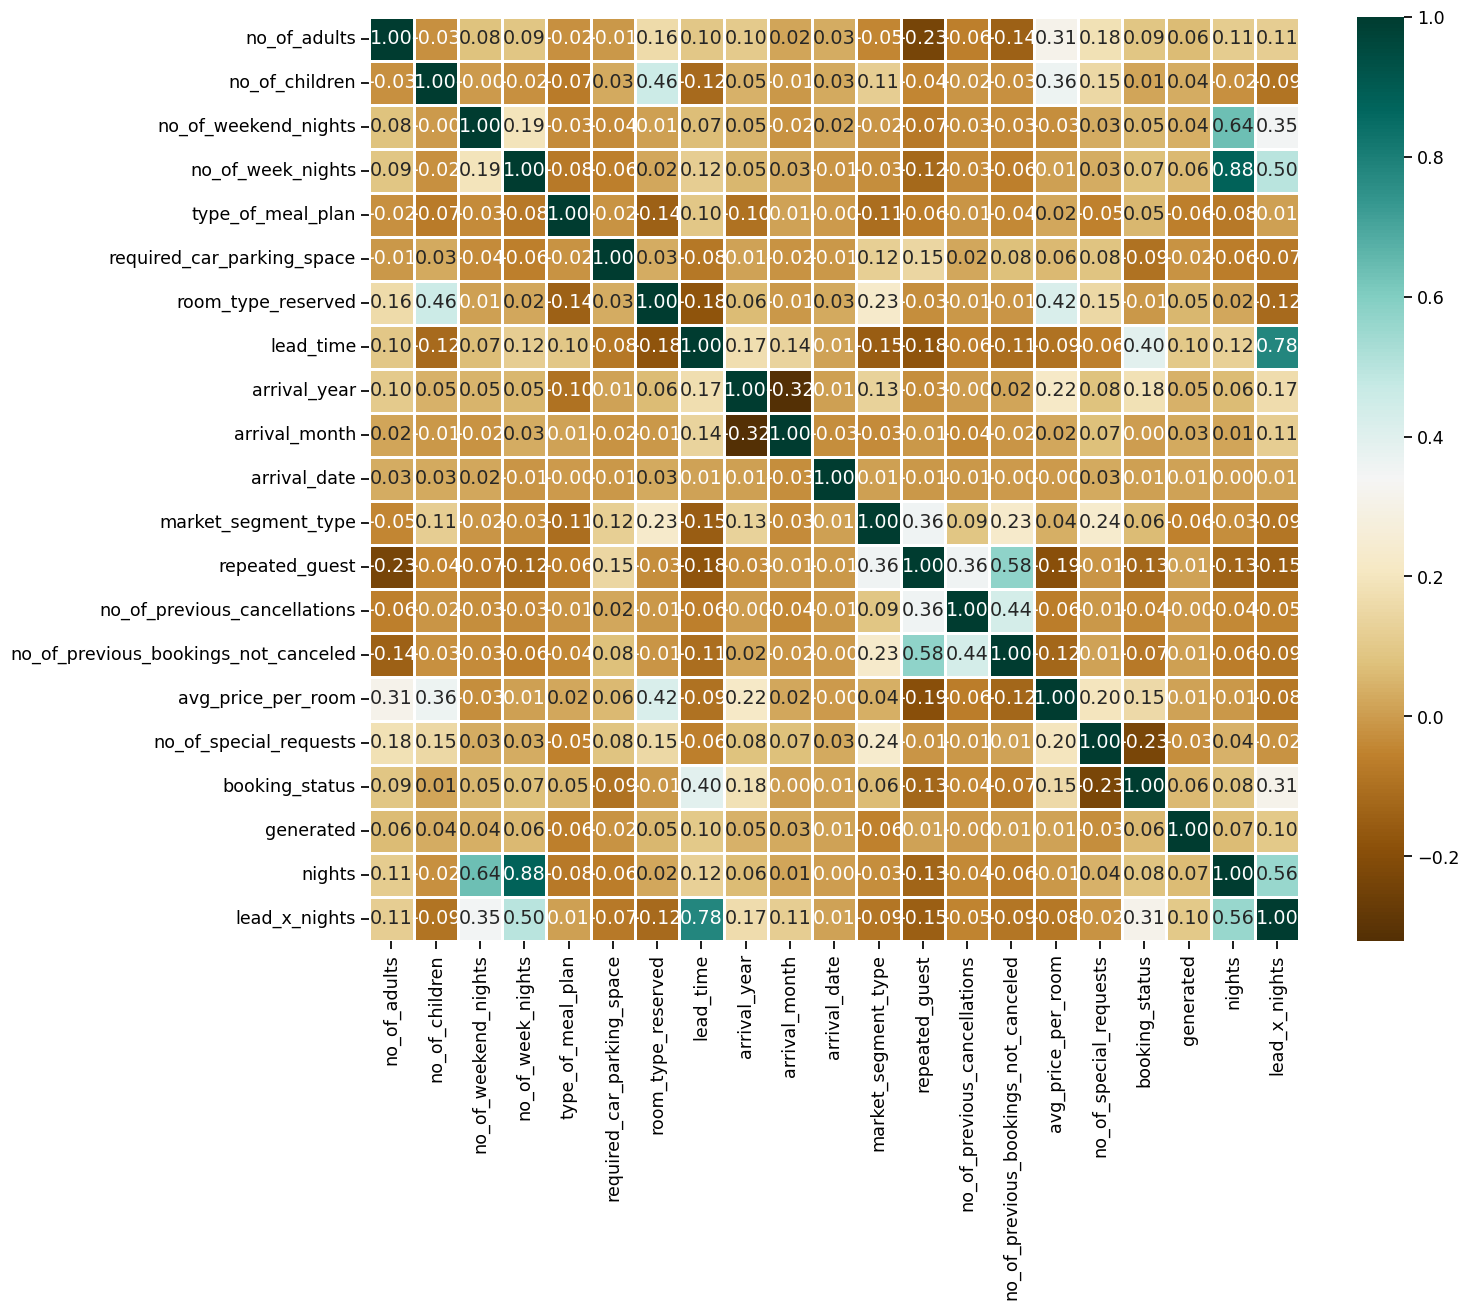

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(train_1.corr(), annot=True, fmt= '.2f', cmap='BrBG', linewidths = 2);

In [33]:
train_1.corr()["booking_status"].sort_values(ascending=False).drop("booking_status")

lead_time                               0.396092
lead_x_nights                           0.313228
arrival_year                            0.181786
avg_price_per_room                      0.154544
no_of_adults                            0.087605
nights                                  0.082416
no_of_week_nights                       0.073057
market_segment_type                     0.061911
generated                               0.061102
type_of_meal_plan                       0.051446
no_of_weekend_nights                    0.051366
no_of_children                          0.014800
arrival_date                            0.006278
arrival_month                           0.003248
room_type_reserved                     -0.007443
no_of_previous_cancellations           -0.041225
no_of_previous_bookings_not_canceled   -0.073963
required_car_parking_space             -0.093757
repeated_guest                         -0.126950
no_of_special_requests                 -0.229640
Name: booking_status

In [34]:
train_1.shape

(60237, 21)

In [35]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 1.0 MB/s eta 0:00:00


In [36]:
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [37]:
features

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'generated',
 'nights',
 'lead_x_nights']

In [38]:
target

'booking_status'

In [39]:
X = train_1[features]
y = train_1[target]

In [40]:
constant = DropConstantFeatures(tol=1)

constant.fit(X)

DropConstantFeatures()

In [41]:
# with tol=0.998 we tell the transformer that we want to remove
# all features that show the same value in more than 99.8% of the
# observations in the dataset

quasi_constant = DropConstantFeatures(tol=0.998)

# find quasi-constant features in the train_1 set
quasi_constant.fit(X)

DropConstantFeatures(tol=0.998)

In [42]:
len(constant.features_to_drop_)
# the constant features can be found in the attribute
# features_to_drop_

0

In [43]:
# the constant features can be found in the attribute
# features_to_drop_

len(constant.features_to_drop_)

0

In [44]:
duplicates = DropDuplicateFeatures()

# find duplicated features in the train_1 set
duplicates.fit(X)

DropDuplicateFeatures()

In [45]:
# the groups or identical variables can be seen in the 
# attribute duplicated_feature_sets

duplicates.duplicated_feature_sets_

[]

In [46]:
# in the attribute features_to_drop_ we find the variables
# from the groups of duplicates that will be dropped

# the transformer only leaves 1 variable per group and removes
# the rest.

duplicates.features_to_drop_

set()

In [47]:
# if variables is set to None, the transformer will examine all variables
# we can choose the correlation method to use (pearson, spearman or kendal)
# and the correlation threshold

correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.9)

# find correlated variables in the train_1 set
correlated.fit(X)

DropCorrelatedFeatures(threshold=0.9)

In [48]:
# in the attribute correlated_feature_sets_ we find the 
# variables that are correlated with each other

# note that several variables can be correlated with each other

correlated.correlated_feature_sets_

[]

In [49]:
import xgboost as xgb
smart_corr = SmartCorrelatedSelection(
    variables=None, # examines all variables
    method="pearson", # the correlation method
    threshold=0.7, # the correlation coefficient threshold
    missing_values="ignore",
    selection_method="model_performance", # how to select the features
    estimator=xgb.XGBClassifier(random_state=42), # the model from which to derive the importance
)

# find correlated features and select the best from each group

# the method builds a random forest using each single feature from the correlated feature group
# and retains the feature from the group with the best performance

smart_corr.fit(X, y)

SmartCorrelatedSelection(estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                             

In [50]:
# the correlated feature groups

smart_corr.correlated_feature_sets_

[{'nights', 'no_of_week_nights'}, {'lead_time', 'lead_x_nights'}]

In [51]:
# remove correlated variables

print('Number of variables before removing correlated: ', X.shape[1])

X = smart_corr.transform(X)

print('Number of variables after removing correlated: ', X.shape[1])

Number of variables before removing correlated:  20
Number of variables after removing correlated:  18


In [52]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'generated', 'nights'],
      dtype='object')

In [53]:
from IPython.display import clear_output
!pip install -U --pre pycaret
clear_output()

from pycaret.classification import setup, compare_models, pull, finalize_model, blend_models, predict_model, models, plot_model

In [54]:
print(test_1_df.columns)
print(len(test_1_df.columns))

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'generated', 'nights',
       'lead_x_nights'],
      dtype='object')
20


In [55]:
print(train_1.columns)
print(len(train_1.columns))

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'generated', 'nights', 'lead_x_nights'],
      dtype='object')
21


In [56]:
Data = X.copy()

In [57]:
print(Data.columns)
print(len(Data.columns))

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'generated', 'nights'],
      dtype='object')
18


In [58]:
features = Data.columns.to_list()

In [59]:
test_1_df = test_1_df[features]

In [60]:
columns = features + [target]

In [61]:
train_1 = train_1[columns]

In [62]:
train_1.shape

(60237, 19)

In [63]:
setup(train_1, target=target, session_id=42)
setup_df = pull()

,Description,Value
0,Session id,42
1,Target,booking_status
2,Target type,Binary
3,Original data shape,"(60237, 19)"
4,Transformed data shape,"(60237, 19)"
5,Transformed train set shape,"(42165, 19)"
6,Transformed test set shape,"(18072, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [64]:
best_models = compare_models(n_select=5)
best_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8429,0.9129,0.7648,0.8041,0.7840,0.6607,0.6612,2.3510
catboost,CatBoost Classifier,0.8397,0.9113,0.7511,0.8057,0.7774,0.6524,0.6534,13.9420
lightgbm,Light Gradient Boosting Machine,0.8375,0.9082,0.7509,0.8007,0.7750,0.6480,0.6489,1.1880
rf,Random Forest Classifier,0.8301,0.8993,0.7384,0.7917,0.7640,0.6315,0.6325,2.6190
gbc,Gradient Boosting Classifier,0.8199,0.8874,0.7002,0.7924,0.7433,0.6054,0.6083,1.9520
et,Extra Trees Classifier,0.8176,0.8747,0.7268,0.7707,0.7481,0.6053,0.6060,2.7020
ada,Ada Boost Classifier,0.7988,0.8710,0.7070,0.7412,0.7236,0.5655,0.5660,0.7390
dt,Decision Tree Classifier,0.7734,0.7613,0.6923,0.6974,0.6948,0.5146,0.5147,0.1600
lda,Linear Discriminant Analysis,0.7731,0.8370,0.6385,0.7209,0.6771,0.5031,0.5054,0.1300
ridge,Ridge Classifier,0.7719,0.0000,0.6299,0.7227,0.6730,0.4992,0.5020,0.0520


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=100,
               n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
               predictor='auto', random_state=42, reg_alpha=0, ...),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jo

In [65]:
blended_model = blend_models(estimator_list=best_models, optimize='AUC')
results_df = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8340,0.9104,0.7447,0.7965,0.7697,0.6402,0.6411
1,0.8416,0.9102,0.7518,0.8095,0.7795,0.6562,0.6573
2,0.8369,0.9076,0.7537,0.7973,0.7749,0.6471,0.6477
3,0.8428,0.9171,0.7436,0.8181,0.7791,0.6575,0.6593
4,0.8373,0.9092,0.7373,0.8094,0.7716,0.6457,0.6474
5,0.8387,0.9114,0.7428,0.8087,0.7744,0.6492,0.6507
6,0.8404,0.9108,0.7530,0.8059,0.7785,0.6540,0.6549
7,0.8439,0.9132,0.7658,0.8058,0.7852,0.6628,0.6633
8,0.8378,0.9113,0.7435,0.8061,0.7735,0.6474,0.6487


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [66]:
finalized_blended_model = finalize_model(blended_model)
predictions = predict_model(finalized_blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8830,0.9641,0.8132,0.8647,0.8381,0.7466,0.7475


In [67]:
predictions

,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,generated,nights,booking_status,prediction_label,prediction_score
42165,2,1,0,0,0,0,182,2018,7,28,...,0,0,0,112.500000,0,1,1,1,1,0.9732
42166,2,0,1,0,0,1,43,2018,8,1,...,0,0,0,140.399994,0,1,2,1,1,0.6767
42167,2,0,0,0,0,0,37,2018,10,13,...,0,0,0,105.000000,0,1,3,1,0,0.8211
42168,1,0,0,0,0,0,32,2017,11,20,...,0,0,0,73.000000,0,0,2,0,0,0.9840
42169,2,0,2,0,0,0,2,2017,8,8,...,0,0,0,90.000000,2,0,4,0,0,0.9821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60232,2,0,2,0,0,0,116,2018,2,28,...,0,0,0,70.000000,0,1,3,1,1,0.7602
60233,2,0,1,0,0,0,169,2018,10,27,...,0,0,0,90.949997,3,1,4,0,0,0.9675
60234,2,0,2,0,0,1,44,2018,6,18,...,0,0,0,96.300003,0,1,3,0,0,0.9357
60235,1,0,1,0,0,0,0,2018,6,20,...,0,0,0,106.400002,0,1,1,0,0,0.9262


In [68]:
unseen_predictions = predict_model(finalized_blended_model, data=test_1_df)
unseen_predictions.head()

,no_of_adults,no_of_children,no_of_weekend_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,generated,nights,prediction_label,prediction_score
0,3,0,1,0,0,1,111,2018,12,5,1,0,0,0,115.599998,2,1,5,0,0.8717
1,2,0,0,0,0,0,22,2017,10,21,0,0,0,0,85.000000,0,1,3,0,0.9393
2,2,2,0,0,0,3,18,2018,8,10,1,0,0,0,240.000000,1,1,1,0,0.5910
3,2,0,0,0,0,0,88,2018,5,30,0,0,0,0,80.750000,0,1,3,0,0.9274
4,1,0,0,2,0,0,7,2018,9,21,1,0,0,0,144.000000,0,1,2,0,0.5350


In [69]:
submission_df["booking_status"] = unseen_predictions["prediction_score"]

In [70]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              28068 non-null  int64  
 1   booking_status  28068 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 438.7 KB


In [71]:
submission_df.to_csv('submission.csv',index = False)
submission_df.head()

,id,booking_status
0,42100,0.8717
1,42101,0.9393
2,42102,0.5910
3,42103,0.9274
4,42104,0.5350
